We can solve the nonlinear poison problem 
$$ -\nabla\cdot(1+u^2)\nabla(u)=f,$$
with boundary conditions

$$ u=1\, on\, T_D,$$
$$ \nabla u\cdot n=0\, on\, T_N.$$

We define $f=x\sin(y)$,

$\Omega=[0,1]\times[0,1]$,

$T_D=\{(1,y)\subset\partial\Omega\}$,

$T_N=\{(x,0)\cup(x,1)\cup(0,y)\subset\partial\Omega\}$.




La forma variacional esta dada por:
$$ - \int_{\Omega} \nabla (g(u) \nabla u)v \,dx =  \int_{\Omega} f v \,dx$$
Usando teorema de Green:
$$ \int_{\Omega} g(u) \nabla u \nabla v \, dx - \int_{\partial \Omega} \frac{\partial u}{\partial \eta} v \, dS = \int_{\Omega} f v \,dx$$
$$ \int_{\Omega} g(u) \nabla u \nabla v \, dx - \left(\int_{\Gamma_D} \frac{\partial u}{\partial \eta} v \, dS + \int_{\Gamma_N} \frac{\partial u}{\partial \eta} v \, dS \right) = \int_{\Omega} f v \,dx $$
Debido a que $v$ se anula en la frontera de dirichlet se tiene que:
$$ \int_{\Omega} g(u) \nabla u \nabla v \, dx - \int_{\Gamma_N} \frac{\partial u}{\partial \eta} v \, dS = \int_{\Omega} f v \,dx $$
Por las condiciones de frontera Neumann, esta tambien se anula, finalmente la forma variacional esta dada por:
$$ \int_{\Omega} g(u) \nabla u \nabla v \, dx = \int_{\Omega} f v \,dx $$

In [5]:
from dolfin import *

In [7]:
def q(u):
    return 1+u**2

Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
1.0576892618274312
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
0.03197590656102621
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
0.0005463732937475042
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
6.680578759205896e-06
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
6.321004150074556e-08
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
4.900815285616914e-10
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in er

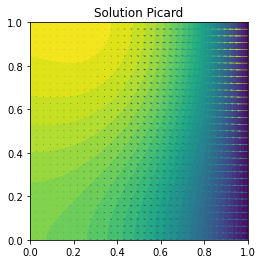

In [8]:
# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)

#solution space with lagrange polynomials of degree 1
V = FunctionSpace(mesh, 'Lagrange', 1)

class DirichletBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return abs(x[0] - 1.0) < DOLFIN_EPS and on_boundary
    
# Define boundary condition (Dirichlet)
g = Constant(1.0)
bc = DirichletBC(V, g, DirichletBoundary())

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
u_k = interpolate(Constant(0.0),V)
#bilinear form
a = inner(q(u_k)*nabla_grad(u),nabla_grad(v))*dx
f =  Expression("x[0]*sin(x[1])", degree=2)
#linear form
L = f*v*dx

#Picard iteration
u = Function(V)
eps = 1
iter = 0
maxiter = 25
while eps > 1.0E-10 and iter < maxiter:
    iter += 1
    solve(a == L, u, bc)
    eps = errornorm(u_k, u, norm_type='L2', degree_rise=3)
    print(eps)
    u_k.assign(u)

plot(u)
plot(grad(u), title="Solution Picard")
# Save solution in VTK format
file = File("picard/nonlinear_poisson.pvd")
file << u

Considere el problema con $f = u$, entonces la forma variacional del problema quedaria:
$$ \int_{\Omega} g(u) \nabla u \nabla v \, dx =  \int_{\Omega} uv \, dx$$

Solving linear variational problem.
0.9999999999999548
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
0.3650741326740712
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
0.14782402123316274
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
0.05989830128134861
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
0.024270995334451446
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
0.009834690825449277
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm

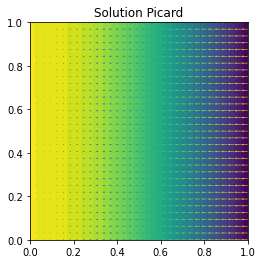

In [10]:
# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)

#solution space with lagrange polynomials of degree 1
V = FunctionSpace(mesh, 'Lagrange', 1)

class DirichletBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return abs(x[0] - 1.0) < DOLFIN_EPS and on_boundary
    
# Define boundary condition (Dirichlet)
g = Constant(1.0)
bc = DirichletBC(V, g, DirichletBoundary())

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
u_k = interpolate(Constant(0.0),V)
#bilinear form
a = inner(g(u_k)*nabla_grad(u),nabla_grad(v))*dx
f =  Expression("x[0]*sin(x[1])", degree=2)
#bilinear form with fixed u
L = u_k*v*dx

#Picard iteration
u = Function(V)
eps = 1
iter = 0
maxiter = 25
while eps > 1.0E-10 and iter < maxiter:
    iter += 1
    solve(a == L, u, bc)
    eps = errornorm(u_k, u, norm_type='L2', degree_rise=3)
    print(eps)
    u_k.assign(u)

plot(u)
plot(grad(u), title="Solution Picard")
# Save solution in VTK format
file = File("picard/nonlinear_poisson.pvd")
file << u


No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 1.776e+01 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-06)
  Newton iteration 1: r (abs) = 9.035e-03 (tol = 1.000e-10) r (rel) = 5.087e-04 (tol = 1.000e-06)
  Newton iteration 2: r (abs) = 2.718e-04 (tol = 1.000e-10) r (rel) = 1.530e-05 (tol = 1.000e-06)
  Newton iteration 3: r (abs) = 1.267e-07 (tol = 1.000e-10) r (rel) = 7.130e-09 (tol = 1.000e-06)
  Newton solver finished in 3 iterations and 3 linear solver iterations.
Object cannot be plotted directly, projecting to piecewise linears.


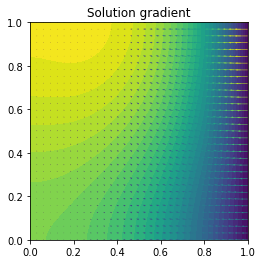

In [12]:
if has_linear_algebra_backend("Epetra"):
    parameters["linear_algebra_backend"] = "Epetra"

# Sub domain for Dirichlet boundary condition
class DirichletBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return abs(x[0] - 1.0) < DOLFIN_EPS and on_boundary

# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
#File("mesh.pvd") << mesh

V = FunctionSpace(mesh, "CG", 1)

# Define boundary condition
g = Constant(1.0)
bc = DirichletBC(V, g, DirichletBoundary())

# Define variational problem
u = Function(V)
v = TestFunction(V)
f = Expression("x[0]*sin(x[1])", degree=3)
F = inner((1 + u**2)*grad(u), grad(v))*dx - f*v*dx

# Compute solution
solve(F == 0, u, bc, solver_parameters={"newton_solver":
                                        {"relative_tolerance": 1e-6}})

# Plot solution and solution gradient
plot(u, title="Solution")
plot(grad(u), title="Solution gradient")